In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("Google_Stock_Price_Train.csv")
df.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [7]:
training_set=df.iloc[:,1:2].values
print(training_set)

[[325.25]
 [331.27]
 [329.83]
 ...
 [793.7 ]
 [783.33]
 [782.75]]


In [9]:
#featire scaling
from sklearn.preprocessing import MinMaxScaler
sc=MinMaxScaler(feature_range=(0,1))
training_set_scaled =sc.fit_transform(training_set)
print(training_set_scaled)

[[0.08581368]
 [0.09701243]
 [0.09433366]
 ...
 [0.95725128]
 [0.93796041]
 [0.93688146]]


In [15]:
#Creating a data structure with 60 timesteps in 1 output
X_train=[]
y_train=[]
for i in range(60,1258):
    X_train.append(training_set_scaled[i-60:i,0])
    y_train.append(training_set_scaled[i,0])
X_train,y_train=np.array(X_train),np.array(y_train)
print(X_train)
print()
print(y_train)

[[0.08581368 0.09701243 0.09433366 ... 0.07846566 0.08034452 0.08497656]
 [0.09701243 0.09433366 0.09156187 ... 0.08034452 0.08497656 0.08627874]
 [0.09433366 0.09156187 0.07984225 ... 0.08497656 0.08627874 0.08471612]
 ...
 [0.92106928 0.92438053 0.93048218 ... 0.95475854 0.95204256 0.95163331]
 [0.92438053 0.93048218 0.9299055  ... 0.95204256 0.95163331 0.95725128]
 [0.93048218 0.9299055  0.93113327 ... 0.95163331 0.95725128 0.93796041]]

[0.08627874 0.08471612 0.07454052 ... 0.95725128 0.93796041 0.93688146]


In [19]:
#Reshaping
X_train=np.reshape(X_train, (X_train.shape[0],X_train.shape[1],1))
print(X_train)

[[[0.08581368]
  [0.09701243]
  [0.09433366]
  ...
  [0.07846566]
  [0.08034452]
  [0.08497656]]

 [[0.09701243]
  [0.09433366]
  [0.09156187]
  ...
  [0.08034452]
  [0.08497656]
  [0.08627874]]

 [[0.09433366]
  [0.09156187]
  [0.07984225]
  ...
  [0.08497656]
  [0.08627874]
  [0.08471612]]

 ...

 [[0.92106928]
  [0.92438053]
  [0.93048218]
  ...
  [0.95475854]
  [0.95204256]
  [0.95163331]]

 [[0.92438053]
  [0.93048218]
  [0.9299055 ]
  ...
  [0.95204256]
  [0.95163331]
  [0.95725128]]

 [[0.93048218]
  [0.9299055 ]
  [0.93113327]
  ...
  [0.95163331]
  [0.95725128]
  [0.93796041]]]


In [21]:
#Building RNN
from keras.models import Sequential
from keras.layers import Dense,LSTM,Dropout

In [22]:
#Initialising the RNN
regressor =Sequential()

#Adding the first LSTM layer and some Dropout regularisation
regressor.add(LSTM(units=50, return_sequences=True,input_shape=(X_train.shape[1],1)))
regressor.add(Dropout(0.2))

In [23]:
#Adding 2nd layer with some Dropout regularisation
regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))

#Adding 3rd layer with some Dropout regularisation
regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))

#Adding 4th layer with some Dropout regularisation
regressor.add(LSTM(units=50)) #return_sequences=False
regressor.add(Dropout(0.2))

In [24]:
#Adding the output layer
regressor.add(Dense(units=1))

In [25]:
#Compiling our RNN
regressor.compile(optimizer='adam',loss='mean_squared_error')
#Or optimizer='remprop'

In [26]:
#Fitting the RNN
regressor.fit(X_train,y_train,epochs=100,batch_size=32)

Epoch 1/100
38/38 [==============================] - 12s 85ms/step - loss: 0.0340
Epoch 2/100
38/38 [==============================] - 3s 80ms/step - loss: 0.0064
Epoch 3/100
38/38 [==============================] - 3s 75ms/step - loss: 0.0054
Epoch 4/100
38/38 [==============================] - 3s 76ms/step - loss: 0.0057
Epoch 5/100
38/38 [==============================] - 3s 77ms/step - loss: 0.0053
Epoch 6/100
38/38 [==============================] - 3s 76ms/step - loss: 0.0051
Epoch 7/100
38/38 [==============================] - 3s 77ms/step - loss: 0.0047
Epoch 8/100
38/38 [==============================] - 3s 84ms/step - loss: 0.0045
Epoch 9/100
38/38 [==============================] - 3s 75ms/step - loss: 0.0045
Epoch 10/100
38/38 [==============================] - 3s 76ms/step - loss: 0.0038
Epoch 11/100
38/38 [==============================] - 3s 76ms/step - loss: 0.0039
Epoch 12/100
38/38 [==============================] - 3s 82ms/step - loss: 0.0043
Epoch 13/100
38/38 [====

In [27]:
#Get real stock price of 2017
dataset_test=pd.read_csv('Google_Stock_Price_Test.csv')
real_stock_price=dataset_test.iloc[:,1:2].values


In [28]:
print(real_stock_price)

[[778.81]
 [788.36]
 [786.08]
 [795.26]
 [806.4 ]
 [807.86]
 [805.  ]
 [807.14]
 [807.48]
 [807.08]
 [805.81]
 [805.12]
 [806.91]
 [807.25]
 [822.3 ]
 [829.62]
 [837.81]
 [834.71]
 [814.66]
 [796.86]]


In [29]:
#Get the predicted stock price of 2017
dataset_total= pd.concat((df["Open"],dataset_test['Open']),axis=0)
print(dataset_total)

0     325.25
1     331.27
2     329.83
3     328.34
4     322.04
       ...  
15    829.62
16    837.81
17    834.71
18    814.66
19    796.86
Name: Open, Length: 1278, dtype: float64


In [33]:
inputs=dataset_total[len(dataset_total)-len(dataset_test)-60:].values
inputs =inputs.reshape(-1,1)
inputs =sc.transform(inputs)
print(inputs)

[[0.9299055 ]
 [0.93113327]
 [0.92750577]
 [0.94415507]
 [0.93876032]
 [0.93403527]
 [0.93483518]
 [0.9313937 ]
 [0.94636878]
 [0.96569685]
 [0.97510976]
 [0.95966962]
 [0.97808617]
 [1.        ]
 [0.98076494]
 [0.97083116]
 [0.98450406]
 [0.96054394]
 [0.9371419 ]
 [0.92841729]
 [0.90804747]
 [0.8771858 ]
 [0.92153434]
 [0.93809063]
 [0.93165414]
 [0.95254483]
 [0.88812412]
 [0.88637547]
 [0.87032145]
 [0.88563137]
 [0.90743359]
 [0.91571173]
 [0.89941588]
 [0.91805566]
 [0.9089404 ]
 [0.9024853 ]
 [0.89456061]
 [0.91600938]
 [0.9132934 ]
 [0.88979835]
 [0.86589404]
 [0.89030062]
 [0.90335962]
 [0.89642086]
 [0.91777662]
 [0.93176576]
 [0.94114145]
 [0.95762334]
 [0.96413424]
 [0.96402262]
 [0.96971501]
 [0.95077759]
 [0.96294367]
 [0.96123223]
 [0.95475854]
 [0.95204256]
 [0.95163331]
 [0.95725128]
 [0.93796041]
 [0.93688146]
 [0.92955205]
 [0.94731751]
 [0.94307612]
 [0.96015329]
 [0.98087655]
 [0.98359253]
 [0.97827219]
 [0.98225314]
 [0.98288563]
 [0.98214153]
 [0.979779  ]
 [0.97

C:\Users\SAVIO\AppData\Local\Temp\ipykernel_15936\1870358401.py:1: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  inputs=dataset_total[len(dataset_total)-len(dataset_test)-60:].values


In [35]:
X_test=[]
for i in range(60,80):
    X_test.append(inputs[i-60:i,0])
X_test=np.array(X_test)
X_test=np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
print(X_test)

[[[0.9299055 ]
  [0.93113327]
  [0.92750577]
  ...
  [0.95725128]
  [0.93796041]
  [0.93688146]]

 [[0.93113327]
  [0.92750577]
  [0.94415507]
  ...
  [0.93796041]
  [0.93688146]
  [0.92955205]]

 [[0.92750577]
  [0.94415507]
  [0.93876032]
  ...
  [0.93688146]
  [0.92955205]
  [0.94731751]]

 ...

 [[0.96054394]
  [0.9371419 ]
  [0.92841729]
  ...
  [1.01045465]
  [1.02407173]
  [1.03930724]]

 [[0.9371419 ]
  [0.92841729]
  [0.90804747]
  ...
  [1.02407173]
  [1.03930724]
  [1.03354044]]

 [[0.92841729]
  [0.90804747]
  [0.8771858 ]
  ...
  [1.03930724]
  [1.03354044]
  [0.99624228]]]


In [36]:
predicted_stock_price=regressor.predict(X_test)
predicted_stock_price=sc.inverse_transform(predicted_stock_price)
print(predicted_stock_price)

1/1 [==============================] - 2s 2s/step
[[782.8765 ]
 [780.0936 ]
 [779.68823]
 [780.88214]
 [784.1578 ]
 [789.88873]
 [795.56067]
 [798.3701 ]
 [798.78796]
 [798.1042 ]
 [797.3449 ]
 [796.8582 ]
 [796.73083]
 [797.33594]
 [798.4022 ]
 [802.4648 ]
 [808.96533]
 [816.33716]
 [820.90656]
 [817.94086]]


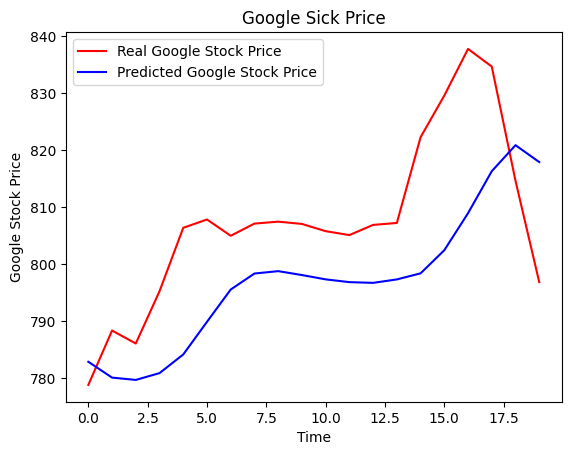

In [39]:
#Visualisation
plt.plot(real_stock_price, color='red', label='Real Google Stock Price')
plt.plot(predicted_stock_price,color='blue',label="Predicted Google Stock Price")
plt.title("Google Sick Price")
plt.xlabel('Time')
plt.ylabel("Google Stock Price")
plt.legend()
plt.show()